In [17]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [19]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [20]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

## Initialize Configs

In [21]:
EXPERIMENT_NAME = 'stress_testing_outliers'
DB_COLLECTION_NAME = f'exp_{EXPERIMENT_NAME}'
DATASET_NAME = 'COMPAS'
EXPERIMENT_SESSION_UUID = '0c9a2f4e-0342-4645-a342-e6551b56866b'
SENSITIVE_ATTRS = ['sex', 'race', 'sex&race']
PREPROCESSING_TECHNIQUES = ['No']

In [22]:
MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier',
               'XGBClassifier', 'KNeighborsClassifier']

In [23]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [24]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [25]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(560, 25)

In [26]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Dataset_Split_Seed,Model_Init_Seed,Injector_Config_Lst,overall,race_dis,race_priv,sex&race_dis,sex&race_priv,sex_dis,sex_priv
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,200,0,OK,2023-04-25 22:56:07.754,...,100,100,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.715909,0.718266,0.712195,0.713755,0.723404,0.711944,0.732673
1,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,200,1,OK,2023-04-25 22:56:07.765,...,100,100,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.714015,0.715170,0.712195,0.710037,0.723404,0.709602,0.732673
2,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,200,2,OK,2023-04-25 22:56:07.775,...,100,100,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.712121,0.718266,0.702439,0.713755,0.702128,0.709602,0.722772
3,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,200,3,OK,2023-04-25 22:56:07.786,...,100,100,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.715909,0.721362,0.707317,0.717472,0.723404,0.711944,0.732673
4,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,200,4,OK,2023-04-25 22:56:07.796,...,100,100,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.712121,0.718266,0.702439,0.710037,0.723404,0.704918,0.742574
5,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,200,5,OK,2023-04-25 22:56:07.806,...,100,100,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.702652,0.708978,0.692683,0.702602,0.723404,0.695550,0.732673
6,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,200,6,OK,2023-04-25 22:56:07.816,...,100,100,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.695076,0.702786,0.682927,0.698885,0.723404,0.688525,0.722772
35,Accuracy,201,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,200,0,OK,2023-04-25 23:14:21.918,...,200,200,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.670455,0.672783,0.666667,0.684015,0.687500,0.675355,0.650943
36,Accuracy,201,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,200,1,OK,2023-04-25 23:14:21.930,...,200,200,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.672348,0.678899,0.661692,0.687732,0.687500,0.675355,0.660377
37,Accuracy,201,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,200,2,OK,2023-04-25 23:14:21.941,...,200,200,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.668561,0.678899,0.651741,0.691450,0.687500,0.672986,0.650943


In [27]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct()

In [28]:
exp_avg_group_metrics_dct = exp_composer.compose_group_metrics(exp_subgroup_metrics_dct)

## Metrics Visualization and Reporting

In [29]:
visualizer = ExperimentsVisualizer(exp_subgroup_metrics_dct=exp_subgroup_metrics_dct,
                                   exp_avg_runs_group_metrics_dct=exp_avg_group_metrics_dct,
                                   dataset_name=DATASET_NAME,
                                   model_names=MODEL_NAMES,
                                   sensitive_attrs=SENSITIVE_ATTRS)

In [30]:
visualizer.melted_exp_avg_runs_subgroup_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1'][0.5]

,Metric,Model_Name,Num_Estimators,Test_Set_Index,Dataset_Split_Seed,Model_Init_Seed,Subgroup,Metric_Value
0,Accuracy,DecisionTreeClassifier,200.0,6.0,100.0,100.0,race_dis,0.702786
1,Entropy,DecisionTreeClassifier,200.0,6.0,100.0,100.0,race_dis,0.354140
2,F1,DecisionTreeClassifier,200.0,6.0,100.0,100.0,race_dis,0.712575
3,FNR,DecisionTreeClassifier,200.0,6.0,100.0,100.0,race_dis,0.320000
4,FPR,DecisionTreeClassifier,200.0,6.0,100.0,100.0,race_dis,0.270270
...,...,...,...,...,...,...,...,...
107,Positive-Rate,DecisionTreeClassifier,200.0,6.0,100.0,100.0,overall,0.811538
108,Selection-Rate,DecisionTreeClassifier,200.0,6.0,100.0,100.0,overall,0.399621
109,Std,DecisionTreeClassifier,200.0,6.0,100.0,100.0,overall,0.124741
110,TNR,DecisionTreeClassifier,200.0,6.0,100.0,100.0,overall,0.791045


In [31]:
visualizer.melted_exp_avg_runs_group_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1'][0.5].head(1000)

,Metric,Model_Name,Group,Metric_Value
0,Equalized_Odds_TPR,DecisionTreeClassifier,sex,0.202273
1,Equalized_Odds_FPR,DecisionTreeClassifier,sex,0.164410
2,Disparate_Impact,DecisionTreeClassifier,sex,1.561983
3,Statistical_Parity_Difference,DecisionTreeClassifier,sex,0.309091
4,Accuracy_Parity,DecisionTreeClassifier,sex,-0.034248
5,Label_Stability_Ratio,DecisionTreeClassifier,sex,1.002013
6,IQR_Parity,DecisionTreeClassifier,sex,-0.037304
7,Std_Parity,DecisionTreeClassifier,sex,-0.037678
8,Std_Ratio,DecisionTreeClassifier,sex,0.757250
9,Jitter_Parity,DecisionTreeClassifier,sex,-0.017087


### Subgroup metrics per dataset, experiment iteration, and model

In [32]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='variance')

alt.VConcatChart(...)

In [33]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='error')

alt.VConcatChart(...)

### Group metrics per dataset and model

In [34]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='variance')

alt.VConcatChart(...)

In [35]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='fairness')

alt.VConcatChart(...)

### Specific subgroup metric per dataset and multiple models

In [36]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Jitter',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [37]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Label_Stability',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [38]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='F1',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [39]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Accuracy',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

### Specific group metric per dataset, experiment iteration, and multiple models

In [40]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric=visualizer.all_group_variance_metrics_lst[1],
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [41]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Disparate_Impact',
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES)

alt.VConcatChart(...)

### Specific subgroup metric per dataset, one model, and multiple preprocessing techniques

In [42]:
visualizer.create_subgroups_grid_pct_lines_per_model_and_preprocessing_plot(subgroup_metric='Jitter', model_name=MODEL_NAMES[0])

alt.VConcatChart(...)

### Box plots for subgroup metrics per model and experiment iteration

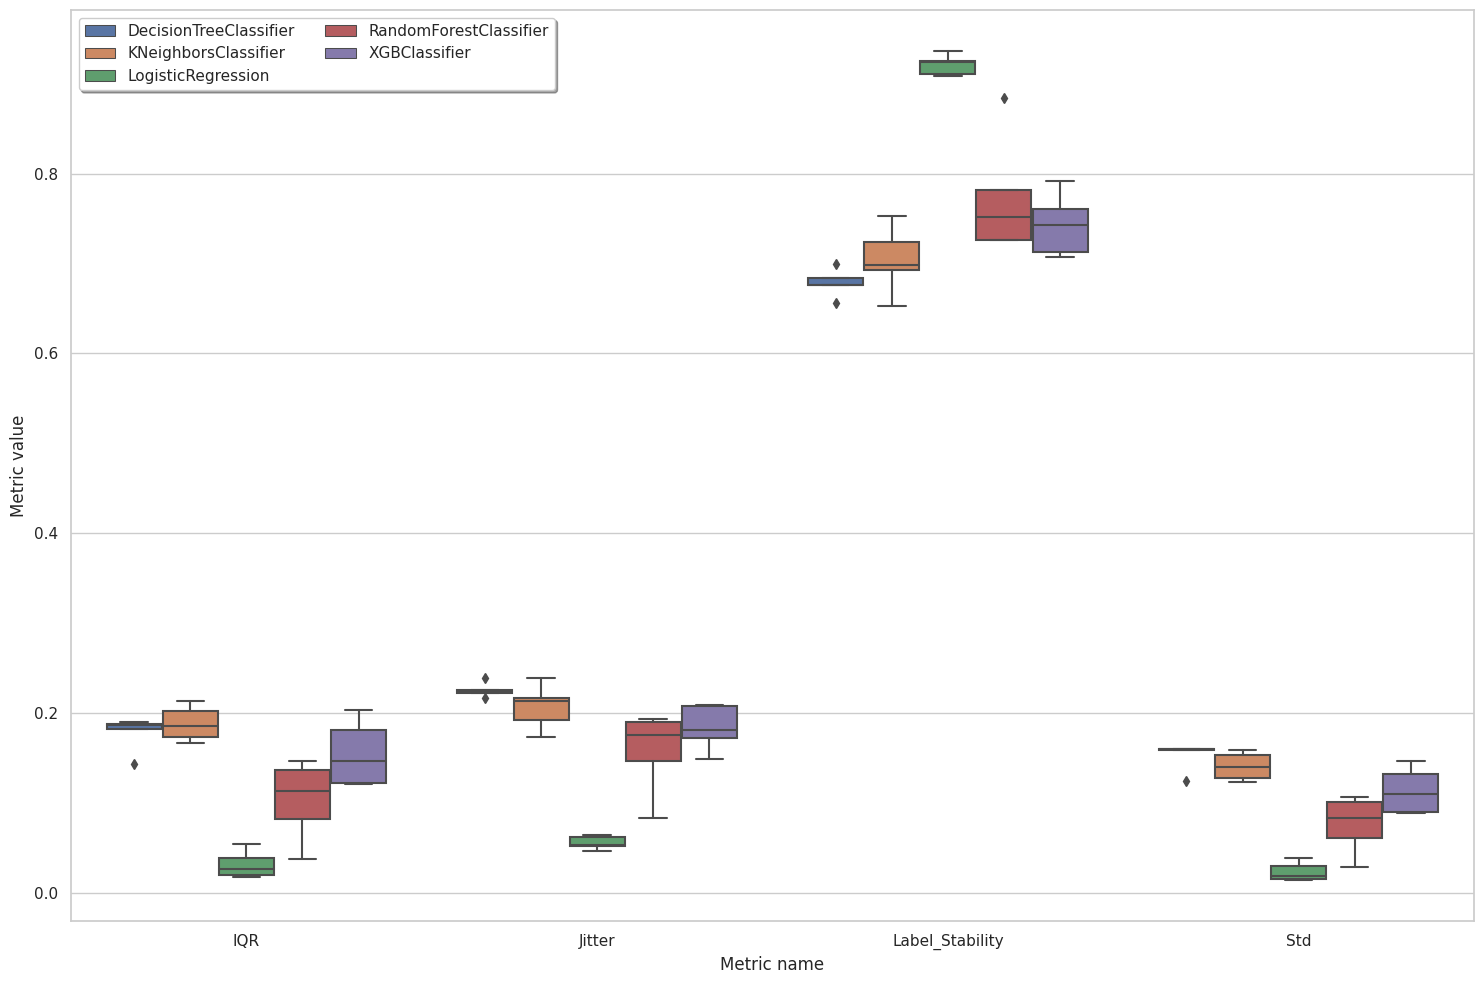

In [43]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=0.5,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='variance')

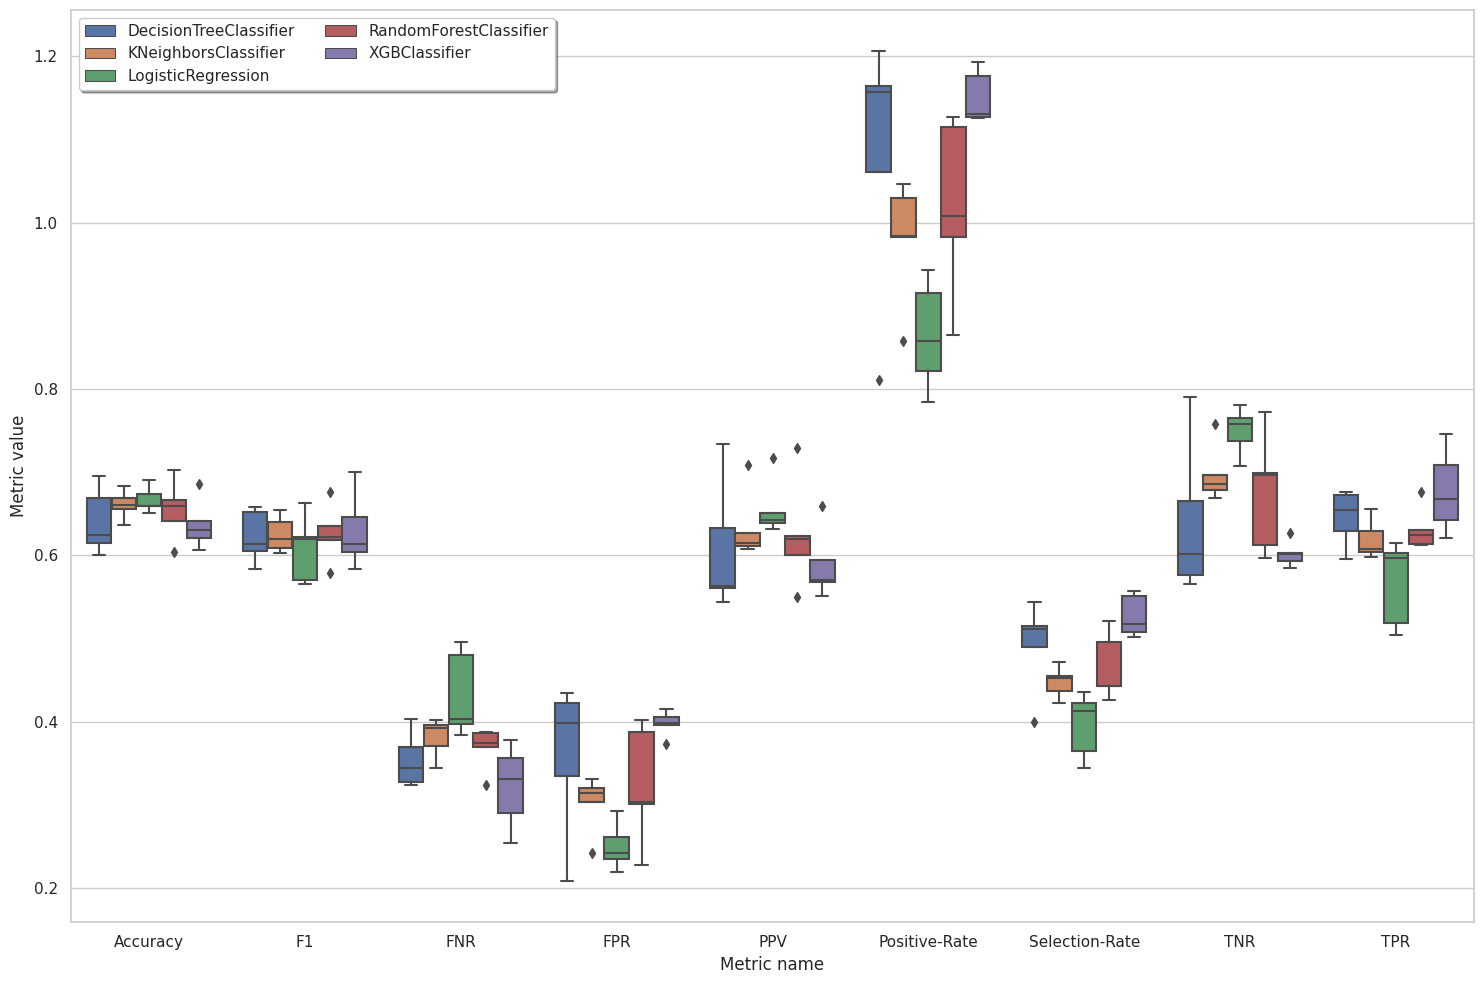

In [44]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=0.5,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='error')

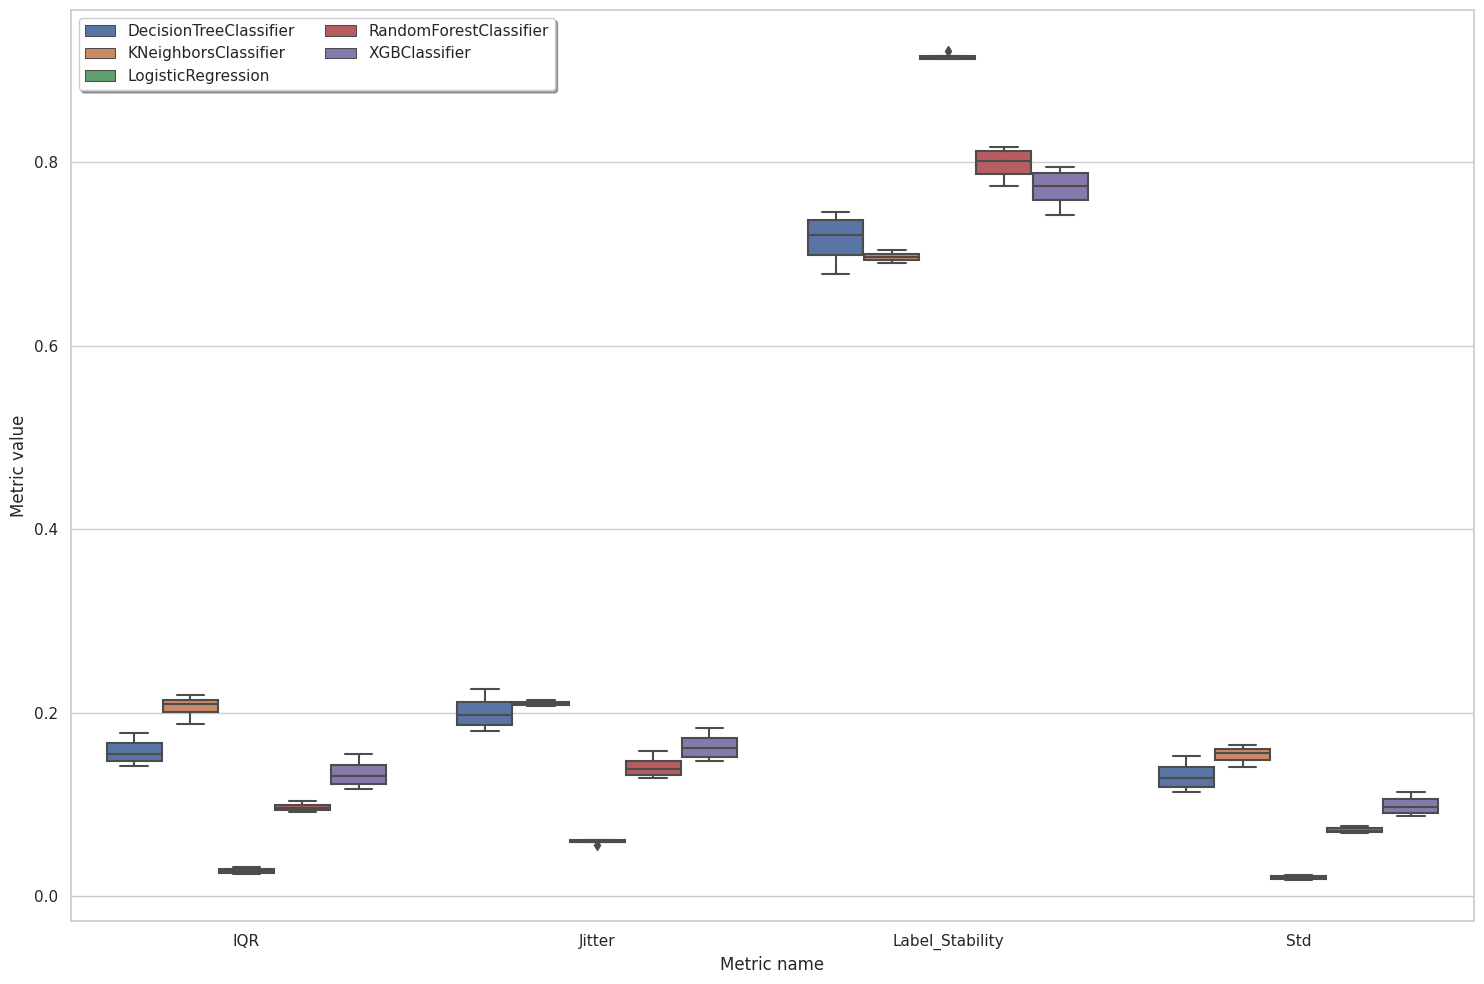

In [45]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='variance')

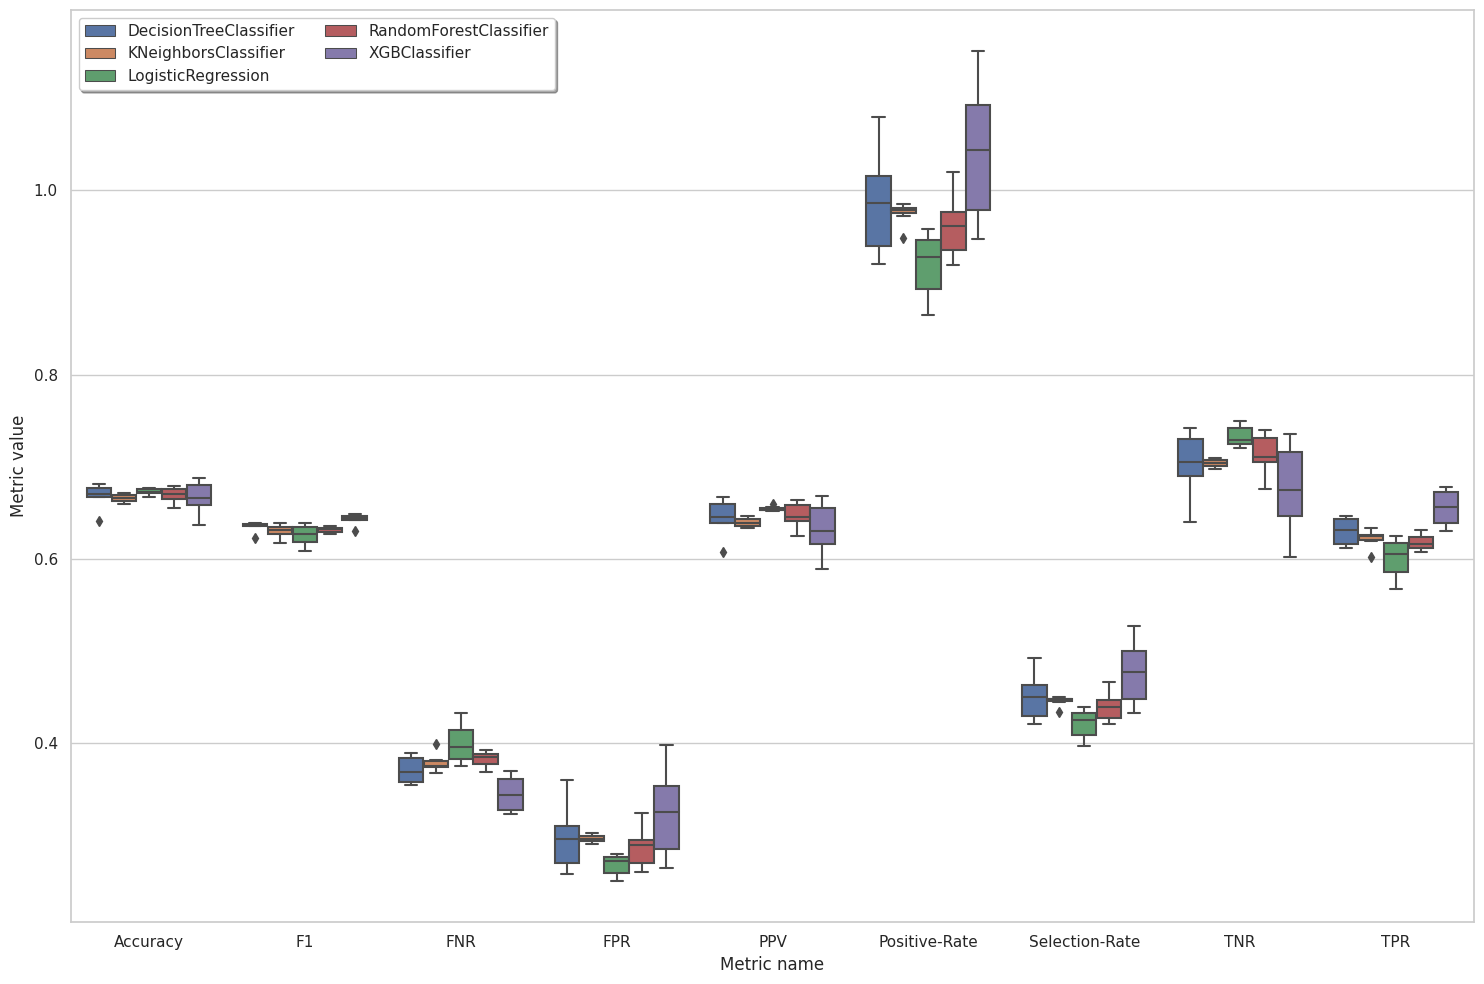

In [46]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='error')

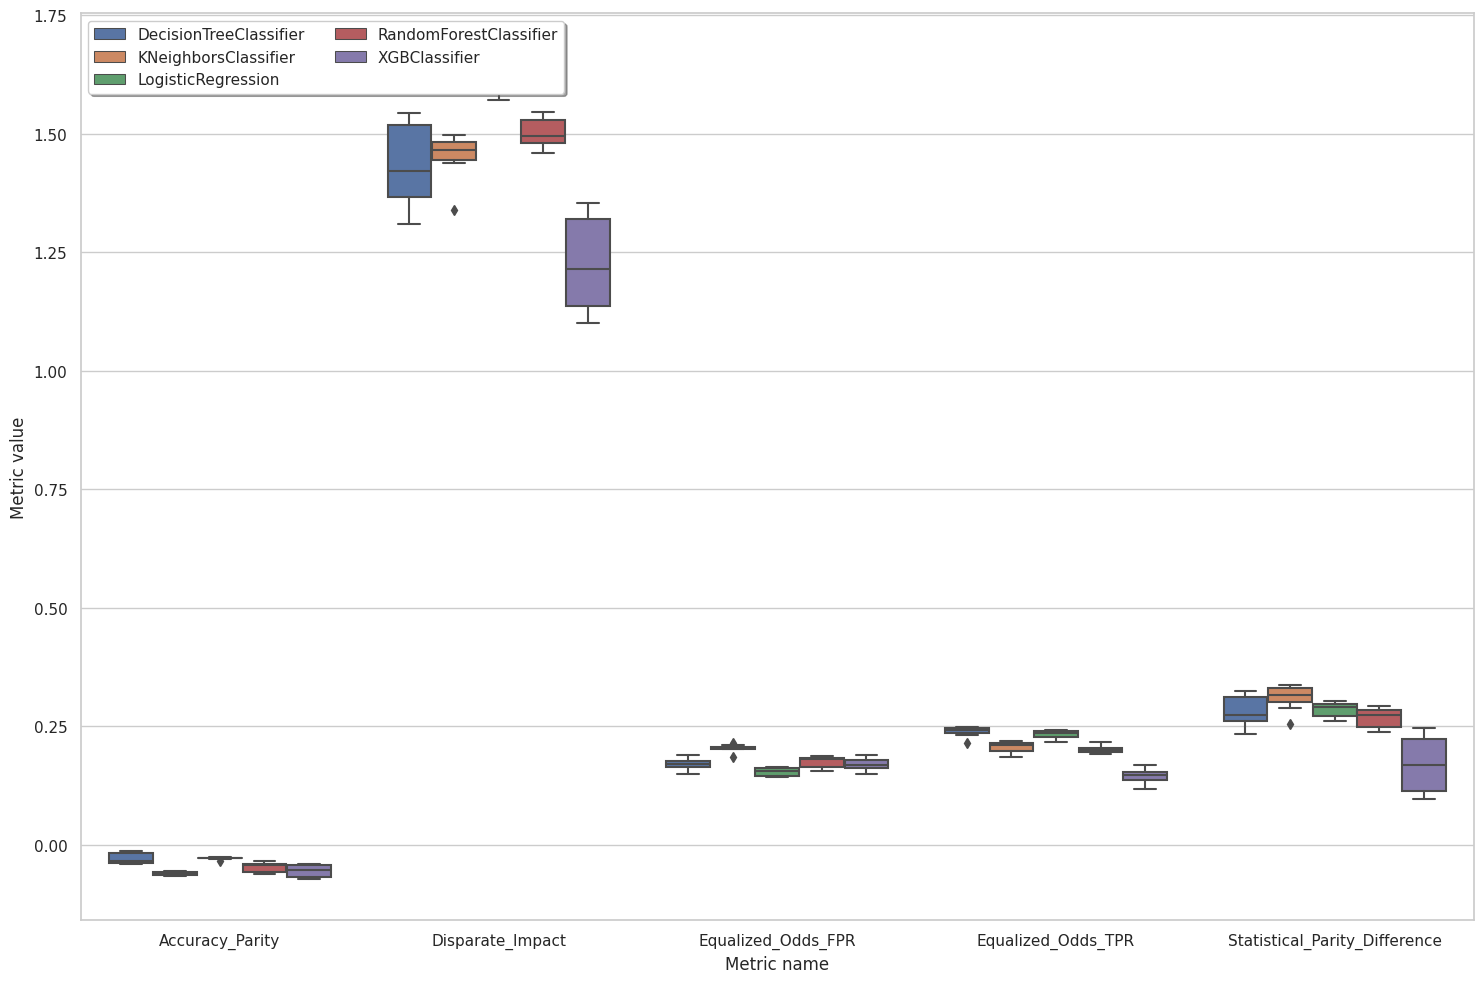

In [47]:
visualizer.create_group_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                  target_group='sex',
                                                                  group_metrics_type='fairness')

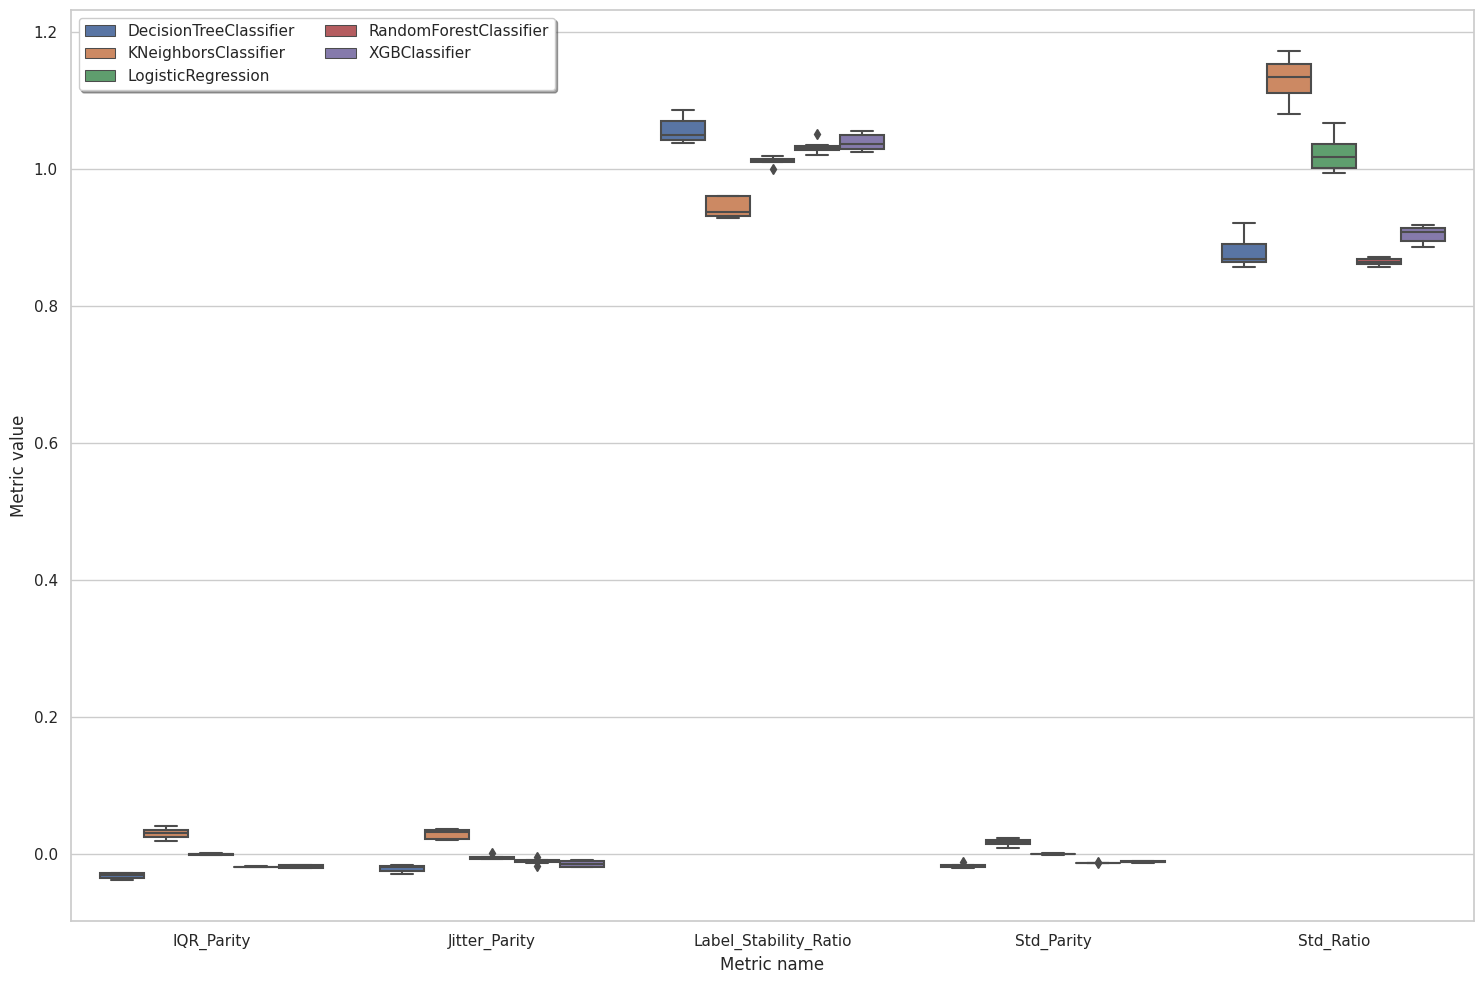

In [48]:
visualizer.create_group_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                  target_group='sex',
                                                                  group_metrics_type='variance')

### One box plot for both error and variance metrics for subgroups

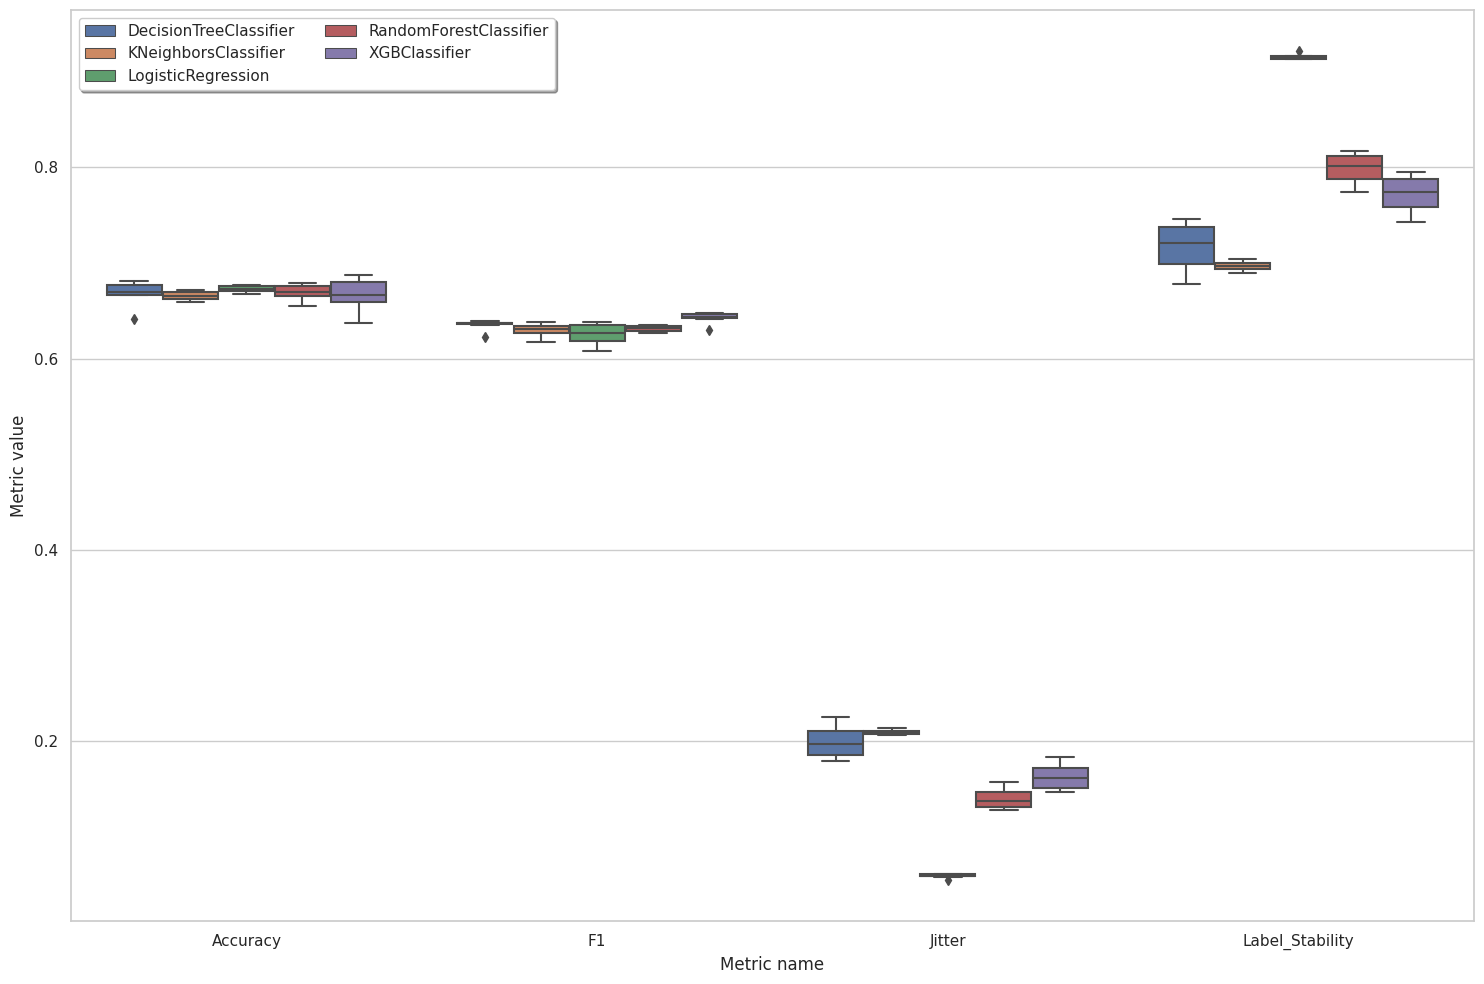

In [49]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics=['F1', 'Accuracy', 'Jitter', 'Label_Stability'])